Marc

In [9]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

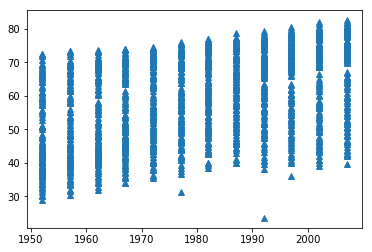

In [10]:
## Exercise 1
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
plt.plot(data['year'], data['lifeExp'], "^")

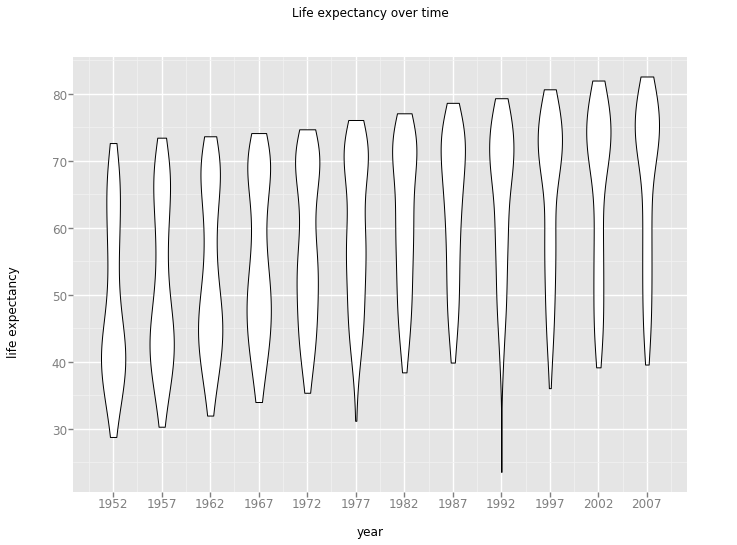

<ggplot: (8782235350080)>

In [11]:
import ggplot
from ggplot import *
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

In [12]:
## Question 1

In [13]:
## Question 2
# During the the earlier years such as years 1952-1982, it is skewed towards the bottom. This means the life expectancy is 
# lower during these years in most countries.

## Question 3
## Question 4
## Question 5

In [14]:
## Exercise 2
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(e2_X, e2_Y)

In [15]:
## Question 6
## Question 7

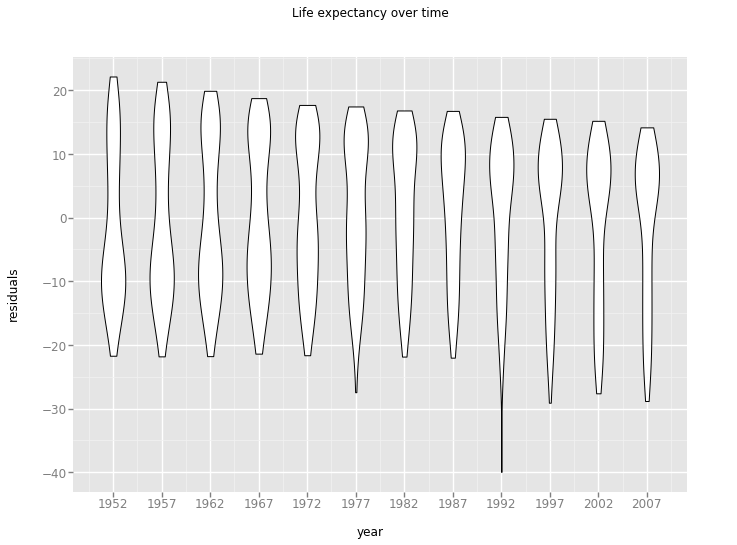

<ggplot: (8782225586212)>

In [16]:
##Exercise 3
pred_lifeExps = []
for x in data['year'].values:
    #print(regfit.predict(x)[0][0])
    pred_lifeExps.append(regfit.predict(x)[0][0])
data['pred_lifeExp'] = pd.Series(pred_lifeExps, index = data.index)
data['residual'] = data['lifeExp'] - data['pred_lifeExp']
ggplot(aes(x='year', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "residuals")
    

In [17]:
## Question 8

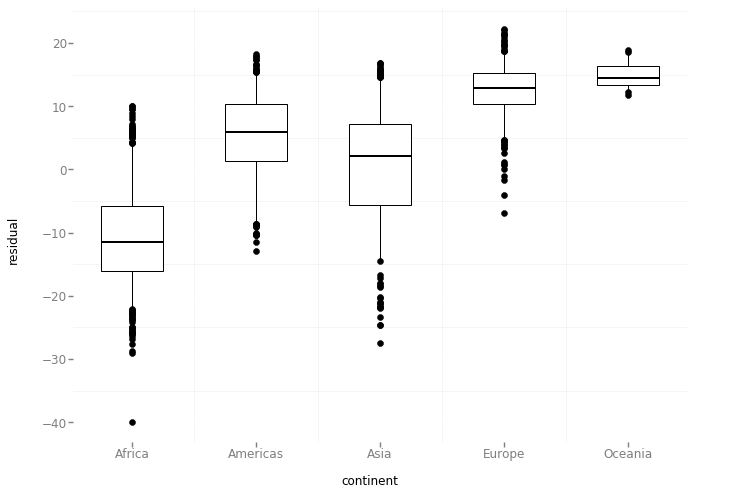

<ggplot: (-9223363254619428373)>

In [18]:
## Exercise 4

ggplot(aes(x='continent', y='residual'), data=data) +\
  geom_boxplot() +\
theme_bw()

In [19]:
## Question 9



/opt/conda/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


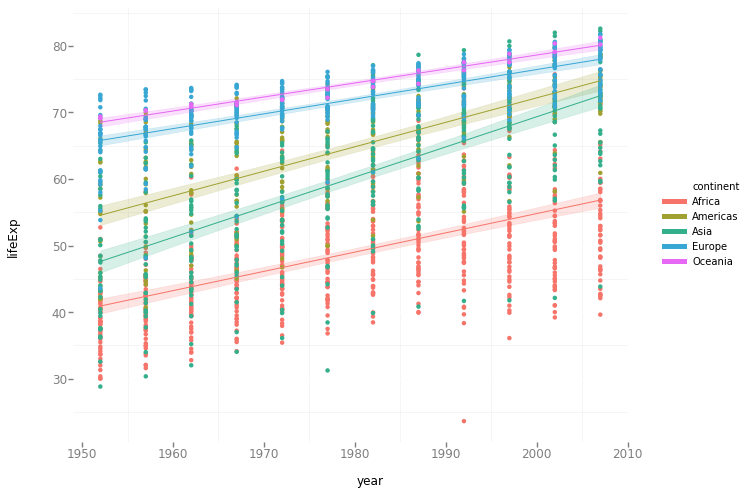

<ggplot: (8782225456879)>

In [20]:
## Exercise 5
# geom_line() <---- Optional

ggplot(aes(x='year', y='lifeExp', color='continent'), data=data) +\
    stat_smooth(method = "lm", se=True, span=0.2) +\
    geom_point(size=20) +\
    theme_bw()


In [21]:
## Question 10



In [23]:
##Exercise 6
import statsmodels.api as sm
from statsmodels.formula.api import ols
temp = data['continent'].values
temp2 = []
for x in temp:
    if x == 'Africa': 
        temp2.append(1)
    elif x == 'Americas':
        temp2.append(2)
    elif x == 'Asia':
        temp2.append(3)
    elif x == 'Europe':
        temp2.append(4)
    else:
        temp2.append(5)
data['continent_index'] = pd.Series(temp2, index = data.index)
regression = ols(formula='lifeExp ~ year + continent_index + year * continent', data=data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 20 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:51:25   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -521.4943     47.441    -10.993      0.000    -614.543    -428.446
continent[T.Americas]       -136.0849     56.099     -2.426      0.015    -246.115     -26.055
continent[T.Asia]           -307.1060     57.962     -5.298      0.000    -420.791    -193.421
continent[T.Europe]          165.1374     71.080      2.323      0.020      25.723     304.552
continent[T.Oceania]         193.4039     86.527      2.235      0.026      23.692     363.116
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
continent_index               -2.7635     23.512     -0.118      0.906     -48.880      43.353
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.25e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
## Exercise 7
## Ftest for Exercise 6
table = sm.stats.anova_lm(regression, typ=2)
table

In [ ]:
## Ftest for Exercise 2
regression2 = ols(formula='lifeExp ~ year', data=data).fit()
table2 = sm.stats.anova_lm(regression2, typ=2)
table2

In [ ]:
## Question 13

In [ ]:
## Exercise 8
pred_lifeExps2 = []
    #print(regfit.predict(x)[0][0])
pred_lifeExps2 = regression.predict()
data['pred_lifeExp2'] = pd.Series(pred_lifeExps2, index = data.index)
data['residual2'] = data['lifeExp'] - data['pred_lifeExp2']
ggplot(aes(x='year', y='residual2'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs year for Interaction",
         x = "year",
         y = "residuals")

In [ ]:
data['residual3'] = data['pred_lifeExp'] - data['pred_lifeExp2']
ggplot(aes(x='year', y='residual3'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs year for Fitted Models",
         x = "year",
         y = "residuals")

In [ ]:
#Part 2
#Problem 1
"""
    X : D-dimensional array of training examples (Say this is NxD -- N examples x D features)
    Y : one-dimensional array of training labels, corresponding to each example.  (if X has dimensions
        NxD, then Y must be a 1xN.  This is the equivalent of one label per example).
    alpha : step-size
    K : Number of iterations
    N: how many vectors in X and elements in Y
"""

def grad_descent(X, Y, alpha, K, N):

    #initialize weights and loss
    theta = np.zeroes(D)
    loss = np.zeroes(K)

    for k in range(K):
        #make predictions for kth iteration
        Yhat = X.dot(theta)
        
        #compute loss and gradient by taking partial derivative of our loss function with respect to our weights theta
        for i in range(N):
            loss[k] += compute_loss(Y[i], Yhat)
            gradient += compute_gradient(X[i], Y[i], theta)

        #update theta by taking a step in direction of gradient
        theta = theta - alpha * gradient

    return theta, loss

Problem 2: Derived Equation
$$ B^{k+1} = B^k + \alpha \sum_{i=1}^{n} [y_i - (\frac{e^{B^k * x_i}}{1 + e^{B^k * x_i}})] x_i $$

In [42]:
#Problem 3
import numpy as np
import math as m
def grad_descent(X, Y, alpha, K, N):

    #initialize weights and loss
    theta = np.zeros(len(X[0]))
    loss = np.zeros(N)
    gradient = 0
    for k in range(K):
        
        #compute loss and gradient by taking partial derivative of our loss function with respect to our weights theta
        for i in range(N):
            loss[i] = compute_loss(X[i], Y[i], theta)
            gradient = loss[i] * X[i]

        #update theta by taking a step in direction of gradient
        theta = theta + alpha * gradient
        theta = theta/np.linalg.norm(theta)
    return theta, loss
def compute_loss(x, y, theta):
    return y - (m.exp(np.dot(theta, x)))/(1+m.exp(np.dot(theta, x)))

In [43]:
#Problem 4
#simulate data for linear regression
from sklearn import datasets
gen_data_x, gen_data_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

[-0.33512433  0.3828155  -0.41233326  0.59349665  0.71561363  0.7554871
 -0.81844658  0.71126831  0.2736304   0.57977153 -0.56265409 -0.12006941
 -0.27263521 -0.6344822   0.39779753  0.33066624  0.53799449 -0.22489719
 -0.61367932 -0.02737065]
[-1.0202228   0.86043037 -0.76666138  0.21505725 -0.20719299 -0.37260755
  0.68741164 -0.19028359  1.2499111   0.25793595 -0.3107135  -2.11184245
 -1.25392868 -0.08298795  0.81244809  1.03583954  0.38572299 -1.46224952
 -0.15087463 -3.59790256]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]


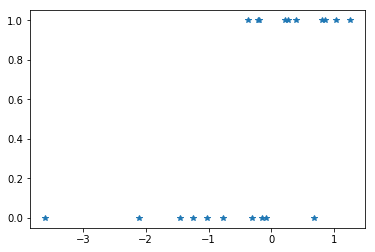

In [44]:
#a really bad estimator
#returns random vector as estimated parameters
(theta, loss) = grad_descent(log_gen_data_x, log_gen_data_y, 5, 5, len(log_gen_data_y))
estimated = np.zeros(len(log_gen_data_y))
for i in range(len(log_gen_data_x[0])):
    estimated += log_gen_data_x[:, i] * theta[i]
estimated += loss
print(loss)
print(estimated)
print(log_gen_data_y)
plt.plot(estimated, log_gen_data_y, '*')

In [45]:
# Try it out
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
from sklearn import tree
from sklearn import metrics

# S imulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
X, dump_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
Y = [0 if i>20 else 1 for i in dump_y]

## Decision Tree Model
model = tree.DecisionTreeClassifier()

# Get scores for ten fold validation (cv=10 means ten fold)
scores1 = cross_val_predict(model, X, Y, cv=10)
print(Y)
print(scores1)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1]


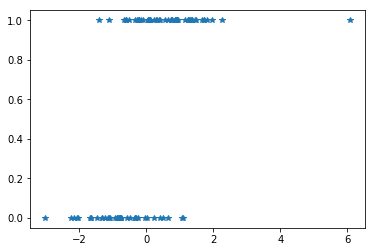

In [46]:
## Scores when using gradient descent
(theta,loss) = grad_descent(X, Y, 20, 20, len(Y))
estimated = np.zeros(len(Y))
for i in range(len(X[0])):
    estimated += X[:, i] * theta[i]
estimated += loss
plt.plot(estimated, Y, '*')

In [47]:
## T test for gradient descent and tree model
from scipy import stats
stats.ttest_rel(scores1,estimated)

Ttest_relResult(statistic=4.5036037607004209, pvalue=1.8289942935450973e-05)

In [48]:
## linear SVM Model
from sklearn import svm

model2 = svm.LinearSVC()
scores2 = cross_val_predict(model2, X, Y, cv=10)
stats.ttest_rel(scores2,estimated)

Ttest_relResult(statistic=5.6797491623089575, pvalue=1.3548448252403625e-07)

In [41]:
#Question 12
regression.params[6:10]

year:continent[T.Americas]    0.078122
year:continent[T.Asia]        0.163593
year:continent[T.Europe]     -0.067597
year:continent[T.Oceania]    -0.079257
dtype: float64